In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Exercise 2.4

There are two kinds of ER graphs. The one we generated in this chapter, $G(n, p)$, is characterized by two parameters: the number of nodes and the probability of an edge between two nodes.

An alternative definition, denoted by $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$. Under this definition, the number of edges is fixed, but their location is random.

In this exercise, we repeated the experiments done in the book using the second definition. 

*    We first have written a function ``m_pairs`` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges. This was done by generating a list of all possible edges and by using ``random_sample``.

*   We then have written a function called ``make_m_graph`` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

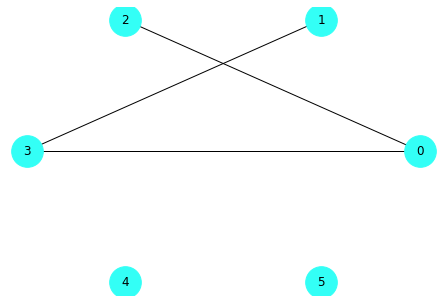

In [3]:
import random

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

def m_pairs(nodes, m):
    possible_pairs = [] 
    for i in all_pairs(nodes):
        possible_pairs.append(i)
    return random.sample(possible_pairs,m)

def make_m_graph(n,m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes,m))
    return G

random_m_graph = make_m_graph(6,3)
nx.draw_circular(random_m_graph,
                 node_color='#33fff6',
                 node_size=1000,
                 with_labels=True)

*    We have written a version of ``prob_connected`` that uses ``make_m_graph`` instead of ``make_random_graph``.

*    We finally computed the probability of connectivity for a range of values of $m$.

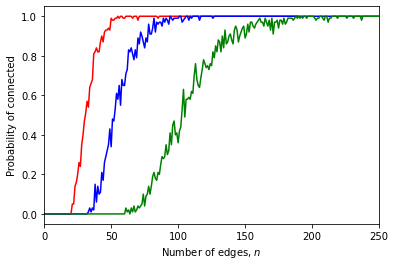

In [5]:
def reachable_nodes(G, start):
    seen = set() #initially, the set is empty
    stack = [start] #initially, the stack has one element, start
    while stack:
        node = stack.pop() #remove one node from the stack
        if node not in seen: #if node is not on seen, 
            seen.add(node)  #(1) add nodes to seen
            stack.extend(G.neighbors(node))#(2) add neighbors to the stack
    return seen #when the stack is empty, return seen

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G,start)
    return len(reachable) == len(G)

def prob_m_connected(n, m, iters=100):
    tf = [is_connected(make_m_graph(n, m)) for i in range(iters)]
    return np.mean(tf)

prob_m_connected(10,15)

n0 = 20
n1 = 30
n2 = 50


def all_of_it(n):
    return int(n*(n-1)/2)

def ms(n):
    return range(all_of_it(n))

def edge_prob(n):
    for p in np.linspace(0,1):
        return int(p*all_of_it(n))

def ys(n):
    return [prob_m_connected(n, m) for m in ms(n)]


plt.plot(ms(n0),ys(n0),"r-")
plt.plot(ms(n1),ys(n1),"b-")
plt.plot(ms(n2),ys(n2), "g-")
plt.xlabel("Number of edges, $n$")
plt.ylabel("Probability of connected")
plt.xlim(0,250)
#plt.xscale('log')
plt.show()
